# Análisis Exploratorio y Regresión Lineal en Datos de E-commerce

## Descripción General
Este notebook tiene como objetivo analizar un conjunto de datos de clientes de e-commerce y construir un modelo de regresión lineal para predecir el gasto anual de los clientes en la plataforma. Se realizará un análisis exploratorio de los datos, incluyendo visualización de correlaciones, división en conjuntos de entrenamiento y prueba, ajuste del modelo y evaluación del rendimiento mediante múltiples métricas.

## Paso 1: Importar las bibliotecas necesarias
Primero, importamos las bibliotecas que utilizaremos para analizar los datos y construir el modelo de regresión lineal.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Paso 2: Carga de datos y exporación inicial de variables
Ahora, se cargan los datos desde un archivo CSV para su análisis. Este paso nos permite trabajar con la información de los clientes de e-commerce. Además, se visualizan las primeras filas para comprender mejor la estructura del dataset y se obtiene información general sobre las columnas, tipos de datos y valores nulos. Esto es importante para verificar si existen datos faltantes o tipos de datos incorrectos


In [28]:
# Cargar los datos desde un archivo CSV
df = pd.read_csv("Ecommerce Customers-1.csv")

# Exploración inicial de los datos
# Mostrar las primeras 5 filas para entender la estructura
display(df.head())
display(df.info())

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


None

# Paso 3: REsumen estadístico de las variables
Con esto Se genera un resumen estadístico de las variables numéricas del dataset
que permite observar tendencias generales y posibles valores atípicos

In [39]:
# Descripción estadística de las variables numéricas
display(df.describe())

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


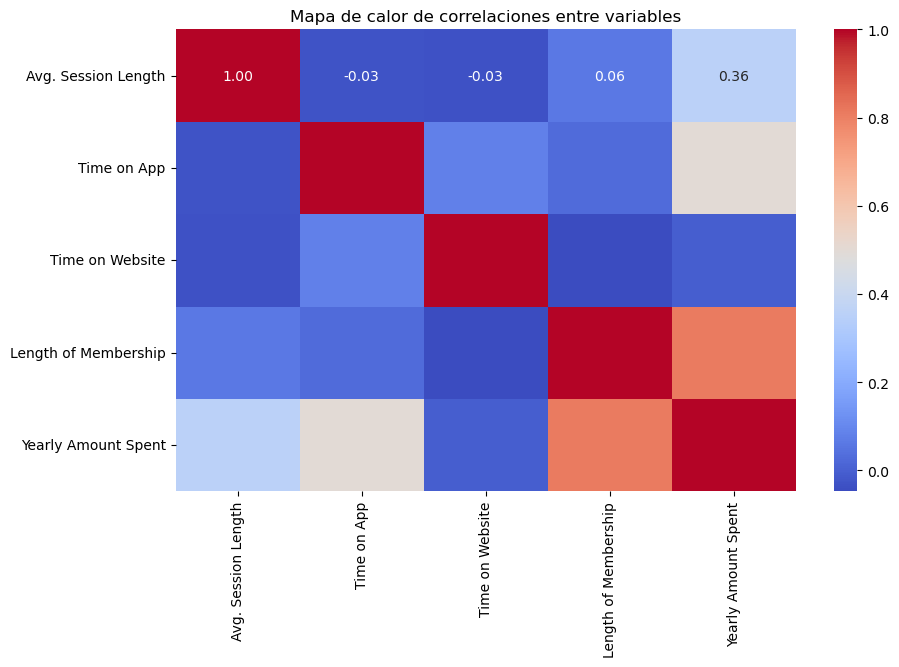

In [30]:
# Visualización de correlaciones entre variables
plt.figure(figsize=(10, 6))  # Definir el tamaño de la figura
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm', fmt='.2f')  # Crear un mapa de calor con solo columnas numéricas
plt.title("Mapa de calor de correlaciones entre variables")  # Agregar título al gráfico
plt.show()

In [31]:
# Selección de variables para la regresión lineal
# Se eligen las variables predictoras (X) y la variable objetivo (y)
X = df[['Time on Website', 'Time on App', 'Length of Membership']]
y = df['Yearly Amount Spent']

In [32]:
# División en conjuntos de entrenamiento y prueba
# 70% de los datos para entrenamiento, 30% para prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [33]:
# Creación del modelo de regresión lineal
modelo = LinearRegression()

# Entrenamiento del modelo con los datos de entrenamiento
modelo.fit(X_train, y_train)

# Generación de predicciones en los datos de prueba
y_pred = modelo.predict(X_test)

In [34]:
# Evaluación del modelo
mae = mean_absolute_error(y_test, y_pred)  # Error absoluto medio
mse = mean_squared_error(y_test, y_pred)  # Error cuadrático medio
rmse = np.sqrt(mse)  # Raíz del error cuadrático medio
r2 = r2_score(y_test, y_pred)  # Coeficiente de determinación (R^2)

In [35]:
# Imprimir los resultados de las métricas
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R^2 Score: {r2}")

MAE: 22.57620980116825
MSE: 758.6208936474462
RMSE: 27.543073424137805
R^2 Score: 0.8603861873916313


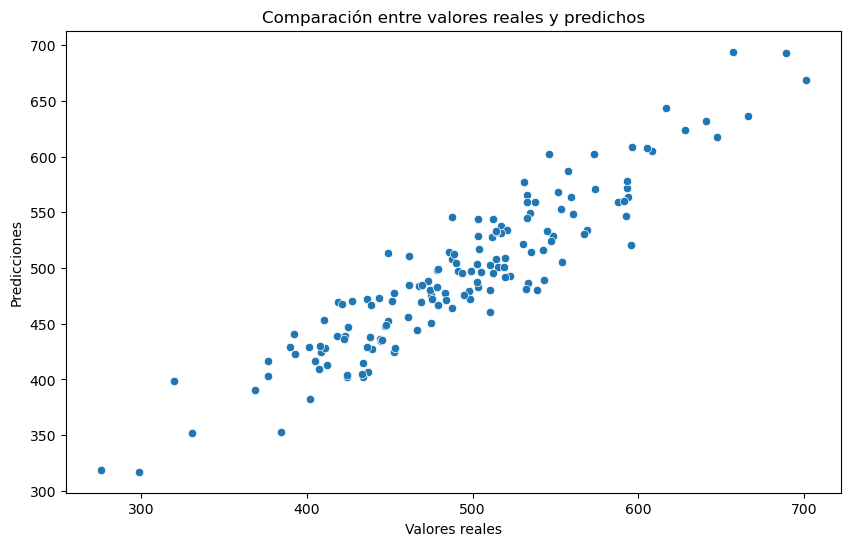

In [36]:
# Visualización de la relación entre los valores reales y los predichos
plt.figure(figsize=(10, 6))  # Definir tamaño de la figura
sns.scatterplot(x=y_test, y=y_pred)  # Gráfico de dispersión entre valores reales y predichos
plt.xlabel("Valores reales")  # Etiqueta del eje X
plt.ylabel("Predicciones")  # Etiqueta del eje Y
plt.title("Comparación entre valores reales y predichos")  # Título del gráfico
plt.show()

c:\Users\ossma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


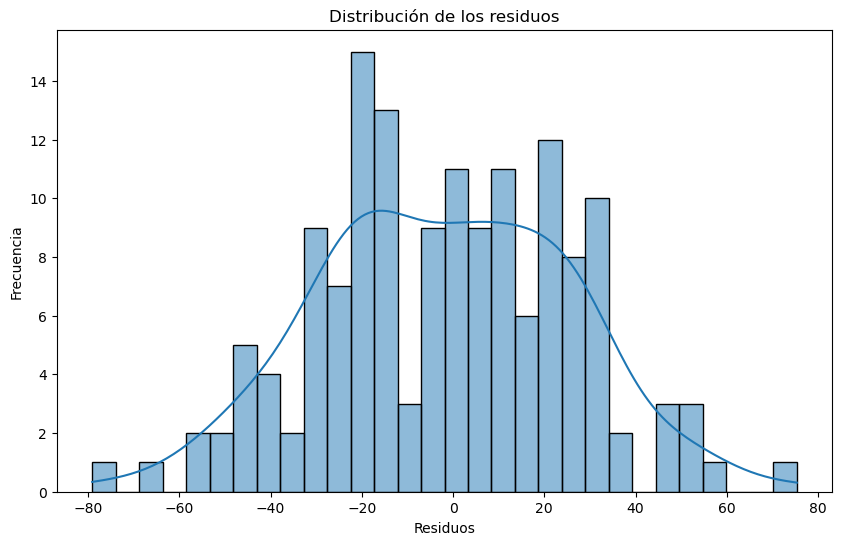

In [37]:
# Análisis de residuos
residuos = y_test - y_pred  # Calcular los residuos (diferencia entre valores reales y predichos)
plt.figure(figsize=(10, 6))  # Definir tamaño de la figura
sns.histplot(residuos, bins=30, kde=True)  # Histograma de residuos con curva de densidad
plt.xlabel("Residuos")  # Etiqueta del eje X
plt.ylabel("Frecuencia")  # Etiqueta del eje Y
plt.title("Distribución de los residuos")  # Título del gráfico
plt.show()


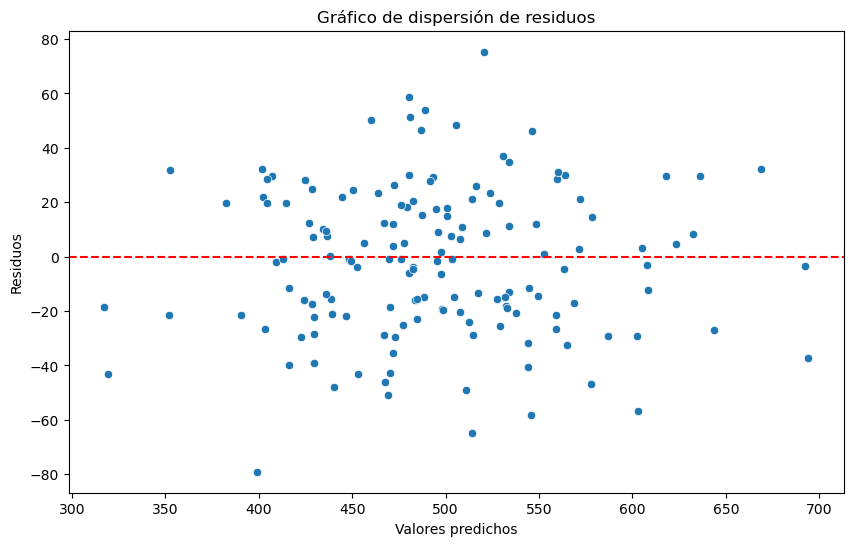

In [38]:
# Gráfico de dispersión de residuos
plt.figure(figsize=(10, 6))  # Definir tamaño de la figura
sns.scatterplot(x=y_pred, y=residuos)  # Gráfico de dispersión de predicciones vs residuos
plt.axhline(y=0, color='r', linestyle='--')  # Línea en y=0 para referencia
plt.xlabel("Valores predichos")  # Etiqueta del eje X
plt.ylabel("Residuos")  # Etiqueta del eje Y
plt.title("Gráfico de dispersión de residuos")  # Título del gráfico
plt.show()
